<a href="https://colab.research.google.com/github/GauravBhakte/Yes-Bank-Stock-Closing-Price-Prediction/blob/main/Capstone_Project_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **YES BANK STOCK CLOSING PRICE PREDICTION**



Yes Bank is a well-known bank in the Indian financial domain. Since 2018, it has been in the news because of the fraud case involving Rana Kapoor. Owing to this fact, it was interesting to see how that impacted the stock prices of the company and whether Time series models or any other predictive models can do justice to such situations. This dataset has monthly stock prices of the bank since its inception and includes closing, starting, highest, and lowest stock prices of every month. The main objective is to predict the stock’s closing price of the month.


Perform regression analysis using multiple models to predict the closing price of the stock and compare the evaluation metrics for all of them to find the best model.

In [ ]:
#Importing The Required Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from numpy import math
 
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import  train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [ ]:
#Mounting the Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#Importing the data
Data=pd.read_csv('/content/drive/MyDrive/datasets/data_YesBank_StockPrices.csv')

# **Data Inspection**

In [ ]:
#Checking For The Features
Data.columns

Index(['Date', 'Open', 'High', 'Low', 'Close'], dtype='object')

In [ ]:
#Checking For The Shape Of The Data
Data.shape

(185, 5)

In [ ]:
#Checking Data For the Top 5 Rows Of Data 
Data.head()

,Date,Open,High,Low,Close
0,Jul-05,13.00,14.00,11.25,12.46
1,Aug-05,12.58,14.88,12.55,13.42
2,Sep-05,13.48,14.87,12.27,13.30
3,Oct-05,13.20,14.47,12.40,12.99
4,Nov-05,13.35,13.88,12.88,13.41


In [ ]:
#Describe The Data
Data.describe()

,Open,High,Low,Close
count,185.000000,185.000000,185.000000,185.000000
mean,105.541405,116.104324,94.947838,105.204703
std,98.879850,106.333497,91.219415,98.583153
min,10.000000,11.240000,5.550000,9.980000
25%,33.800000,36.140000,28.510000,33.450000
50%,62.980000,72.550000,58.000000,62.540000
75%,153.000000,169.190000,138.350000,153.300000
max,369.950000,404.000000,345.500000,367.900000


In [ ]:
#Checking For The Info
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 185 entries, 0 to 184
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    185 non-null    object 
 1   Open    185 non-null    float64
 2   High    185 non-null    float64
 3   Low     185 non-null    float64
 4   Close   185 non-null    float64
dtypes: float64(4), object(1)
memory usage: 7.4+ KB


# Data Cleaning

In [ ]:

#Checking For The Null Values
Data.isnull().sum()

Date     0
Open     0
High     0
Low      0
Close    0
dtype: int64

In [ ]:
#Checking For The Duplicate values
len(Data[Data.duplicated()])

0

In [ ]:
## Required the changing data type of date 
# Here converted the data type of integer into Datetime using the string parse time 
from datetime import datetime
Data['Date']=Data['Date'].apply(lambda x:datetime.strptime(x,'%b-%y'))

In [ ]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 185 entries, 0 to 184
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    185 non-null    datetime64[ns]
 1   Open    185 non-null    float64       
 2   High    185 non-null    float64       
 3   Low     185 non-null    float64       
 4   Close   185 non-null    float64       
dtypes: datetime64[ns](1), float64(4)
memory usage: 7.4 KB


In [ ]:
Data.head()

,Date,Open,High,Low,Close
0,2005-07-01,13.00,14.00,11.25,12.46
1,2005-08-01,12.58,14.88,12.55,13.42
2,2005-09-01,13.48,14.87,12.27,13.30
3,2005-10-01,13.20,14.47,12.40,12.99
4,2005-11-01,13.35,13.88,12.88,13.41


# **Outliers**

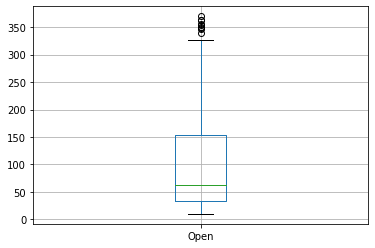

In [ ]:

#Boxplot for Open Feature
Data.boxplot('Open')

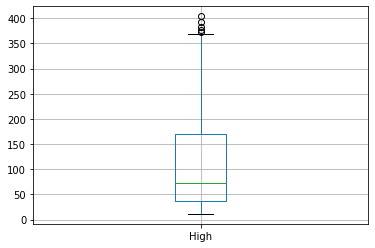

In [ ]:
#Boxplot For High Feature
Data.boxplot('High')

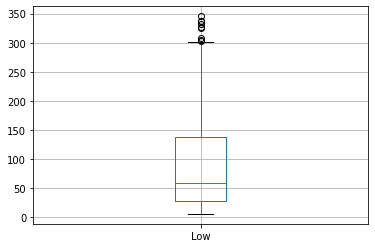

In [ ]:
#Boxplot For Low Feature
Data.boxplot('Low')

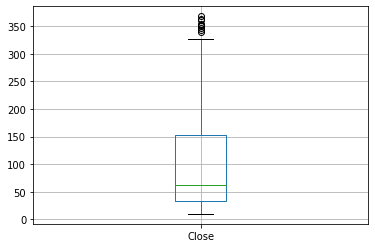

In [ ]:
#Boxplot For Close Feature
Data.boxplot('Close')

# **Exploratory Data Analysis**

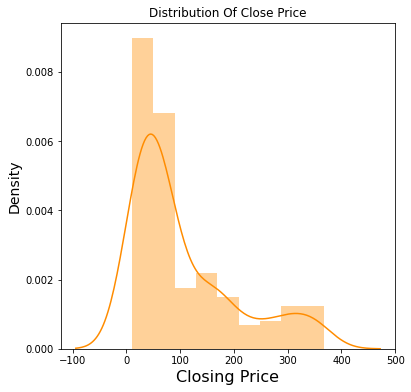

In [ ]:
#Dependent Variables in Close
#Normal distribution
plt.figure(figsize=(6,6))
sns.distplot(Data['Close'],color="DarkOrange")
plt.title('Distribution Of Close Price')
plt.xlabel('Closing Price',fontsize=16)
plt.ylabel('Density',fontsize=14)
plt.show()


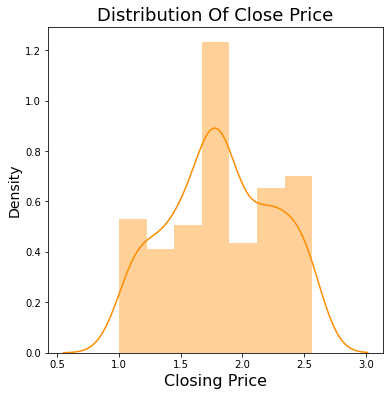

In [ ]:
#Distribution Plot Of Closing Price For Applying Log Transformation
plt.figure(figsize=(6,6))
sns.distplot(np.log10(Data['Close']),color='DarkOrange')
plt.title('Distribution Of Close Price',fontsize=18)
plt.xlabel('Closing Price',fontsize=16)
plt.ylabel('Density',fontsize=14)
plt.show()

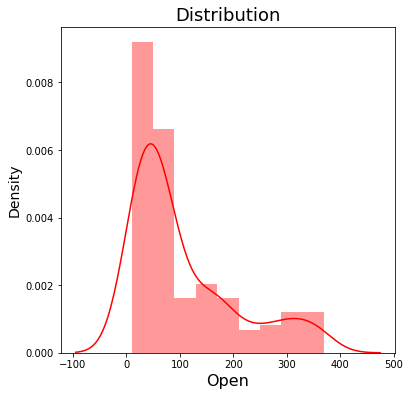

In [ ]:
#Plotting Distribution For Each Features
#For Normal Distribution
#Plotting For Distribution Of Open
plt.figure(figsize=(6,6))
sns.distplot(Data['Open'],color='Red')
plt.title('Distribution',fontsize=18)
plt.xlabel('Open',fontsize=16)
plt.ylabel('Density',fontsize=14)
plt.show()

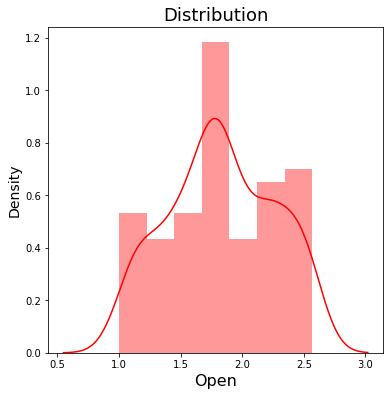

In [ ]:
plt.figure(figsize=(6,6))
sns.distplot(np.log10(Data['Open']),color='Red')
plt.title('Distribution',fontsize=18)
plt.xlabel('Open',fontsize=16)
plt.ylabel('Density',fontsize=14)
plt.show()

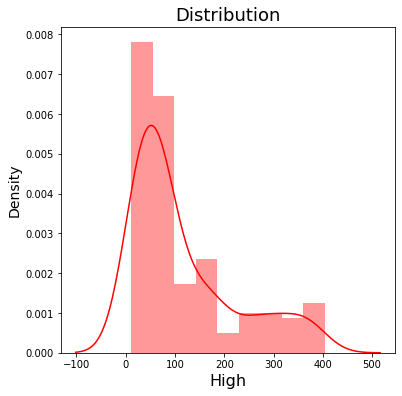

In [ ]:

plt.figure(figsize=(6,6))
sns.distplot(Data['High'],color='Red')
plt.title('Distribution',fontsize=18)
plt.xlabel('High',fontsize=16)
plt.ylabel('Density',fontsize=14)
plt.show()

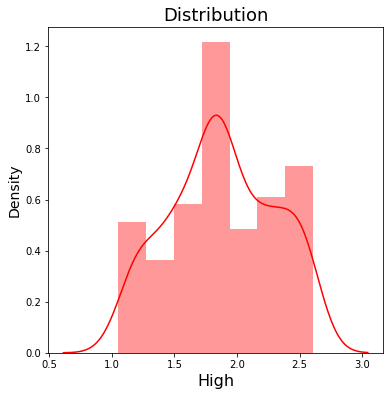

In [ ]:
plt.figure(figsize=(6,6))
sns.distplot(np.log10(Data['High']),color='Red')
plt.title('Distribution',fontsize=18)
plt.xlabel('High',fontsize=16)
plt.ylabel('Density',fontsize=14)
plt.show()

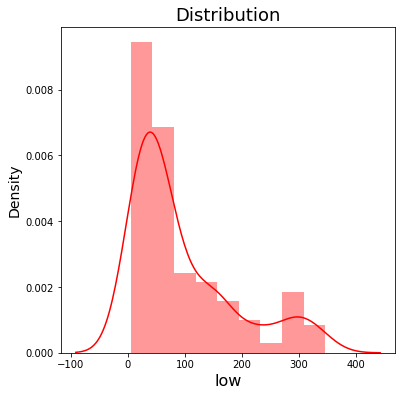

In [ ]:
plt.figure(figsize=(6,6))
sns.distplot(Data['Low'],color='Red')
plt.title('Distribution',fontsize=18)
plt.xlabel('low',fontsize=16)
plt.ylabel('Density',fontsize=14)
plt.show()

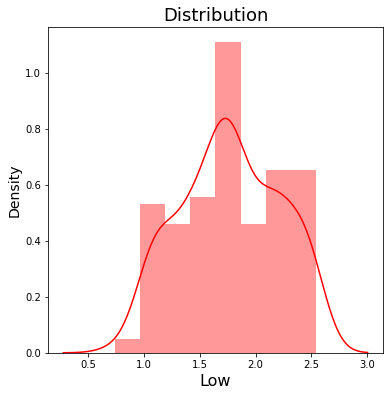

In [ ]:
plt.figure(figsize=(6,6))
sns.distplot(np.log10(Data['Low']),color='Red')
plt.title('Distribution',fontsize=18)
plt.xlabel('Low',fontsize=16)
plt.ylabel('Density',fontsize=14)
plt.show()

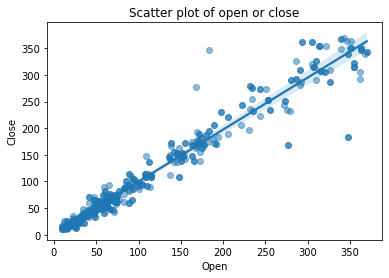

In [ ]:

#Now find out the correlation between the Dependent variables and Independent Variables
#Scatter pot with best fit line
plt.scatter(Data['Close'],Data['Open'],alpha=0.5) 
plt.title('Scatter plot of open or close')
plt.xlabel('Open')
plt.ylabel('Class')
sns.regplot(x='Open',y='Close',data=Data)
plt.show()

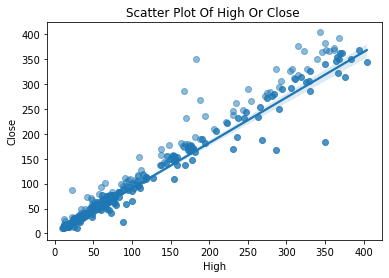

In [ ]:
plt.scatter(Data['Close'], Data['High'], alpha=0.5)
plt.title('Scatter Plot Of High Or Close ')
plt.xlabel('Open')
plt.ylabel('Class')
sns.regplot(x ='High', y = 'Close', data= Data)
plt.show()

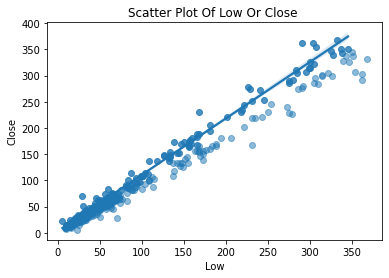

In [ ]:
plt.scatter(Data['Close'], Data['Low'], alpha=0.5)
plt.title('Scatter Plot Of Low Or Close ')
plt.xlabel('Low')
plt.ylabel('Class')
sns.regplot(x ='Low', y = 'Close', data= Data)
plt.show()

# **Correlation**

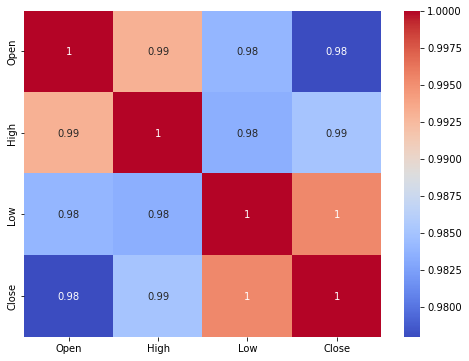

In [ ]:
#Let's find out Correlation with heatmap
#Correlation
plt.figure(figsize=(8,6))
correlation=Data.corr()
sns.heatmap(abs(correlation),annot=True,cmap='coolwarm')

In [ ]:
# multicorrelinearity
# VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor
def cal_vif(X):

  # calculating VIF
  vif =pd.DataFrame()
  vif["variables"] = X.columns
  vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X. shape[1])]

  return(vif)

In [ ]:
cal_vif(Data[[i for i in Data.describe().columns if i not in ['Date', 'Close']]])

,variables,VIF
0,Open,175.185704
1,High,167.057523
2,Low,71.574137


In [ ]:
#Here we will drop the open feature from the VIP Matrix
cal_vif(Data[[i for i in Data.describe().columns if i not in ['Date','Close','Open']]])

,variables,VIF
0,High,62.598129
1,Low,62.598129


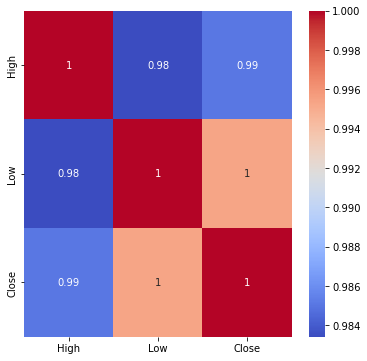

In [ ]:
#Correlation of Heatmap
plt.figure(figsize=(6,6))
sns.heatmap(Data[['High','Low','Close']].corr(),annot=True,cmap='coolwarm')
plt.show()

# **Train Test Split**

In [ ]:
#Splitting our data into dependent and independent variables

X=Data.drop(columns=['Close','Date'])
y=Data['Close']

In [ ]:

#Data Transformation
from scipy.stats import zscore
X=X.apply(zscore)
y=np.log10(y)

In [ ]:
#Splitting the data into training set and testing set data
#Splitting the data with 80-20
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=1)

In [ ]:
#Shape of the training Data
print(X_train.shape)

(148, 3)


In [ ]:
#Shape of the testing Data
print(X_test.shape)

(37, 3)


In [ ]:
#Transforming Data
scaler=MinMaxScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

# **Linear Regression**

In [ ]:
regressor=LinearRegression()
regressor.fit(X_train,y_train)

LinearRegression()

In [ ]:
#train accuracy of linear regression model
round(regressor.score(X_train,y_train),4)

0.8147

In [ ]:
#test accuracy of linear regression model
round(regressor.score(X_test,y_test),4)


0.8226

In [ ]:
#Prediction of the test  data
y_pred=regressor.predict(X_test)
y_pred

array([1.51738682, 1.53211837, 1.63519027, 1.47539354, 2.01471458,
       2.74366588, 1.62601875, 1.51851685, 1.52352095, 1.62092587,
       2.07716025, 1.61560053, 1.47290774, 2.63685207, 1.70384859,
       1.61032504, 1.52501328, 1.95399032, 1.81967493, 1.76423173,
       1.53162271, 1.480381  , 1.83883617, 1.6394682 , 2.05986731,
       1.49003242, 1.4767562 , 1.61402383, 1.53535964, 1.66894676,
       2.4177132 , 2.75914846, 1.68261819, 2.34869197, 1.78260049,
       1.62415017, 2.34100799])

In [ ]:
np.array(y_test)

array([1.4034637 , 1.40823997, 1.72090317, 1.08849047, 2.17011497,
       2.53096768, 1.68708284, 1.44638181, 1.3588862 , 1.69757803,
       2.21301278, 1.70731463, 1.12742878, 2.49837948, 1.84553212,
       1.69390274, 1.4724639 , 2.17429246, 2.05648559, 1.94517305,
       1.50419892, 1.19368103, 2.0342674 , 1.81947813, 2.22520587,
       1.2662317 , 1.08778142, 1.69731654, 1.45682135, 1.81967552,
       2.43941165, 2.53932706, 1.7895102 , 2.36973522, 2.00121433,
       1.72762258, 2.38639194])

In [ ]:
#Creating the Data of test and test Data
train_dataset=pd.DataFrame(X_train,y_train)
test_Data=pd.DataFrame(10**y_test)
test_Data.rename(columns={'Close':'Actual Closing Price'},inplace=True)


In [ ]:
test_Data['Predicted Closing Price']=10**y_pred
test_Data.head()

,Actual Closing Price,Predicted Closing Price
16,25.32,32.914467
179,25.60,34.050099
66,52.59,43.170817
40,12.26,29.880891
166,147.95,103.446210


# **Evaluation of Linear Regression**

In [ ]:
#Test performance of linear Regression
print('MSE:',round(mean_squared_error(y_test,y_pred),4))
print('MSE:',round(math.sqrt(mean_squared_error(y_test,y_pred)),4))
print('MAE:',round(mean_absolute_error(y_test,y_pred),4))
print('MAPE:',round(mean_absolute_percentage_error(y_test,y_pred),4))
print('r2:',round(r2_score(y_test,y_pred),4))

MSE: 0.0316
MSE: 0.1777
MAE: 0.1513
MAPE: 0.0954
r2: 0.8226


Text(0, 0.5, 'Predicted test value')

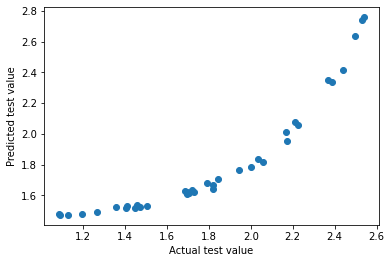

In [ ]:
plt.scatter(y_test,y_pred)
plt.xlabel('Actual test value')
plt.ylabel('Predicted test value')

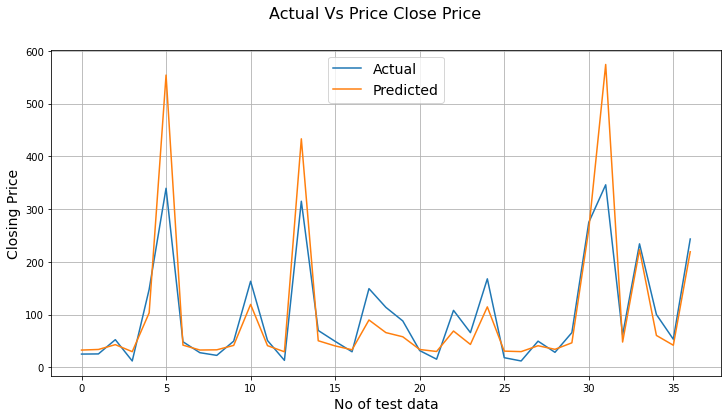

In [ ]:
#Actual Price vs predicted price for Linear Regression Plot
plt.figure(figsize=(12,6))
plt.plot(10**(np.array(y_test)))
plt.plot(10**(y_pred))
plt.suptitle('Actual Vs Price Close Price',fontsize=16)
plt.legend(['Actual','Predicted'],fontsize=14)
plt.xlabel('No of test data',fontsize=14)
plt.ylabel('Closing Price',fontsize=14)
plt.grid()

# **Implementing Lasso Regression**

In [ ]:
from sklearn.linear_model import Lasso
lasso=Lasso(alpha=0.005,max_iter=3000)
lasso.fit(X_train,y_train) 

Lasso(alpha=0.005, max_iter=3000)

In [ ]:
round(lasso.score(X_train,y_train),4)

0.8126

In [ ]:
y_pred_lasso=lasso.predict(X_test)

In [ ]:
y_pred_lasso

array([1.53168982, 1.54626433, 1.64772636, 1.49274256, 2.00936688,
       2.70568011, 1.64049984, 1.53226521, 1.54014459, 1.63199019,
       2.06835968, 1.62551073, 1.49038208, 2.59859084, 1.71090087,
       1.62196586, 1.53924848, 1.95160324, 1.81420729, 1.76583684,
       1.54650943, 1.49845368, 1.83941542, 1.64493997, 2.04922943,
       1.50676826, 1.49408116, 1.62334947, 1.5500453 , 1.67959931,
       2.38074349, 2.72386965, 1.69275547, 2.33070315, 1.78213011,
       1.63392977, 2.31195507])

In [ ]:
np.array(y_test)

array([1.4034637 , 1.40823997, 1.72090317, 1.08849047, 2.17011497,
       2.53096768, 1.68708284, 1.44638181, 1.3588862 , 1.69757803,
       2.21301278, 1.70731463, 1.12742878, 2.49837948, 1.84553212,
       1.69390274, 1.4724639 , 2.17429246, 2.05648559, 1.94517305,
       1.50419892, 1.19368103, 2.0342674 , 1.81947813, 2.22520587,
       1.2662317 , 1.08778142, 1.69731654, 1.45682135, 1.81967552,
       2.43941165, 2.53932706, 1.7895102 , 2.36973522, 2.00121433,
       1.72762258, 2.38639194])

In [ ]:
#Test performance of Lasso Regression model
print('MSE:',round(mean_squared_error(y_test,y_pred_lasso),4))
print('MSE:',round(math.sqrt(mean_squared_error(y_test,y_pred_lasso)),4))
print('MAE:',round(mean_absolute_error(y_test,y_pred_lasso),4))
print('MAPE:',round(mean_absolute_percentage_error(y_test,y_pred_lasso),4))
print('r2:',round(r2_score(y_test,y_pred_lasso),4))

MSE: 0.0326
MSE: 0.1806
MAE: 0.1535
MAPE: 0.0978
r2: 0.8168


Text(0, 0.5, 'Predicted value')

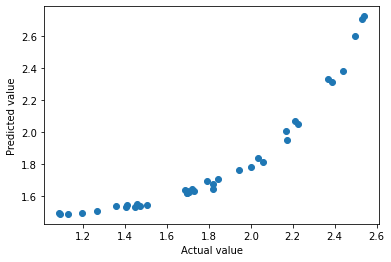

In [ ]:
plt.scatter((y_test),(y_pred_lasso))
plt.xlabel('Actual value')
plt.ylabel('Predicted value')

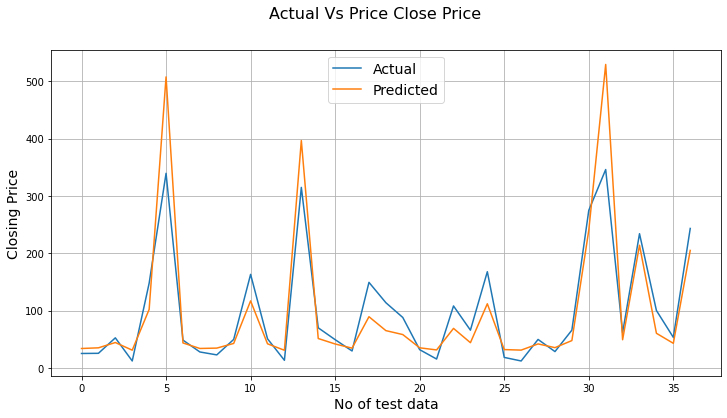

In [ ]:
#Actual vs Predicted value plot for Lasso Regresion
plt.figure(figsize=(12,6))
plt.plot(10**(np.array(y_test)))
plt.plot(10**(y_pred_lasso))
plt.suptitle('Actual Vs Price Close Price',fontsize=16)
plt.legend(['Actual','Predicted'],fontsize=14)
plt.xlabel('No of test data',fontsize=14)
plt.ylabel('Closing Price',fontsize=14)
plt.grid()

# **Implementing The Cross Validation Of Lasso**




In [ ]:
#Importing the Gridsearch 
from sklearn.model_selection import GridSearchCV

In [ ]:
#Hyper Parameter of Tunning for Lasso Regression
lasso=Lasso()
parameters={'alpha':[1e-15,1e-13,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1e-1,1,5,10,20,30,40,45,50,55,60,100]}
lasso_regressor=GridSearchCV(lasso,parameters,scoring='neg_mean_squared_error',cv=3,return_train_score=True)
lasso_regressor.fit(X_train,y_train)

GridSearchCV(cv=3, estimator=Lasso(),
             param_grid={'alpha': [1e-15, 1e-13, 1e-10, 1e-08, 1e-05, 0.0001,
                                   0.001, 0.01, 0.1, 1, 5, 10, 20, 30, 40, 45,
                                   50, 55, 60, 100]},
             return_train_score=True, scoring='neg_mean_squared_error')

In [ ]:
print('The best fit alfha value is found to be:',round(lasso_regressor.best_params_['alpha'],4))
print('The negative mean squared error is:',round(lasso_regressor.best_score_,4))

The best fit alfha value is found to be: 0.001
The negative mean squared error is: -0.0352


In [ ]:
#Prediction of Test data
y_pred_lasso=lasso_regressor.predict(X_test)
y_pred_lasso

array([1.51948517, 1.53474676, 1.64008318, 1.47887097, 2.01529694,
       2.7437218 , 1.63177602, 1.51986028, 1.52812486, 1.62387701,
       2.07832179, 1.61758243, 1.47681346, 2.63226656, 1.70654748,
       1.61353024, 1.52730079, 1.95658217, 1.81264649, 1.76336203,
       1.53486131, 1.48494559, 1.84017341, 1.63671799, 2.05886139,
       1.49383792, 1.48024548, 1.61501616, 1.53873718, 1.67352788,
       2.40238239, 2.76153997, 1.68698106, 2.35080149, 1.78006184,
       1.62620093, 2.33253503])

In [ ]:
np.array(y_test)

array([1.4034637 , 1.40823997, 1.72090317, 1.08849047, 2.17011497,
       2.53096768, 1.68708284, 1.44638181, 1.3588862 , 1.69757803,
       2.21301278, 1.70731463, 1.12742878, 2.49837948, 1.84553212,
       1.69390274, 1.4724639 , 2.17429246, 2.05648559, 1.94517305,
       1.50419892, 1.19368103, 2.0342674 , 1.81947813, 2.22520587,
       1.2662317 , 1.08778142, 1.69731654, 1.45682135, 1.81967552,
       2.43941165, 2.53932706, 1.7895102 , 2.36973522, 2.00121433,
       1.72762258, 2.38639194])

In [ ]:
#Test Performance
print('MSE:',round(mean_squared_error(y_test,y_pred_lasso),4))
print('MSE:',round(math.sqrt(mean_squared_error(y_test,y_pred_lasso)),4))
print('MAE:',round(mean_absolute_error(y_test,y_pred_lasso),4))
print('MAPE:',round(mean_absolute_percentage_error(y_test,y_pred_lasso),4))
print('r2:',round(r2_score(y_test,y_pred_lasso),4))

MSE: 0.032
MSE: 0.1789
MAE: 0.1522
MAPE: 0.0961
r2: 0.8202


Text(0, 0.5, 'Predicted value')

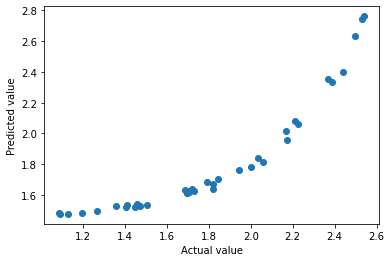

In [ ]:
plt.scatter((y_test),(y_pred_lasso))
plt.xlabel('Actual value')
plt.ylabel('Predicted value')

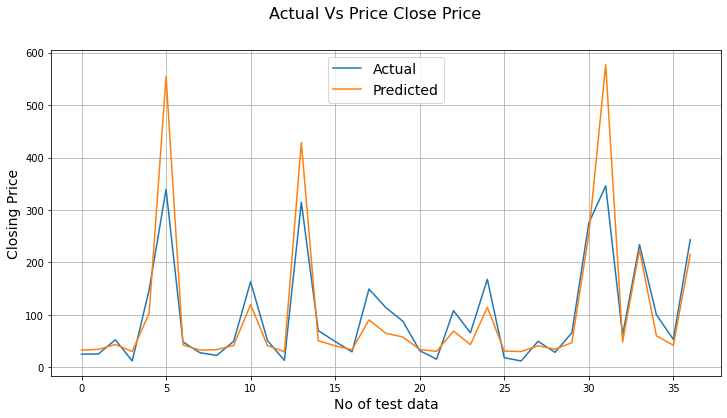

In [ ]:
plt.figure(figsize=(12,6))
plt.plot(10**(np.array(y_test)))
plt.plot(10**(y_pred_lasso))
plt.suptitle('Actual Vs Price Close Price',fontsize=16)
plt.legend(['Actual','Predicted'],fontsize=14)
plt.xlabel('No of test data',fontsize=14)
plt.ylabel('Closing Price',fontsize=14)
plt.grid()

# **Implementing Ridge Regression**

In [ ]:
#Fit Data into Ridge Regression
from sklearn.linear_model import Ridge
ridge=Ridge(alpha=0.1)
ridge.fit(X_train,y_train)

Ridge(alpha=0.1)

In [ ]:
#Accuracy Of ridge regression
round(ridge.score(X_train,y_train),4)

0.8141

In [ ]:
#Prediction of test data
y_pred_ridge=ridge.predict(X_test)
y_pred_ridge

array([1.51681675, 1.53255024, 1.64135134, 1.47687218, 2.01963705,
       2.75155235, 1.63473225, 1.51693004, 1.52773879, 1.62318793,
       2.08158597, 1.61542024, 1.47455115, 2.63508426, 1.70593368,
       1.61278434, 1.52495118, 1.95973505, 1.80785023, 1.76121244,
       1.53334058, 1.48368101, 1.84037593, 1.6326748 , 2.05955474,
       1.49175569, 1.47829991, 1.6125058 , 1.53709372, 1.67458833,
       2.39845583, 2.77299789, 1.68838401, 2.35904715, 1.77719596,
       1.62440651, 2.33055613])

In [ ]:
np.array(y_test)

array([1.4034637 , 1.40823997, 1.72090317, 1.08849047, 2.17011497,
       2.53096768, 1.68708284, 1.44638181, 1.3588862 , 1.69757803,
       2.21301278, 1.70731463, 1.12742878, 2.49837948, 1.84553212,
       1.69390274, 1.4724639 , 2.17429246, 2.05648559, 1.94517305,
       1.50419892, 1.19368103, 2.0342674 , 1.81947813, 2.22520587,
       1.2662317 , 1.08778142, 1.69731654, 1.45682135, 1.81967552,
       2.43941165, 2.53932706, 1.7895102 , 2.36973522, 2.00121433,
       1.72762258, 2.38639194])

In [ ]:
#Test Performance
print('MSE:',round(mean_squared_error(y_test,y_pred_ridge),4))
print('MSE:',round(math.sqrt(mean_squared_error(y_test,y_pred_ridge)),4))
print('MAE:',round(mean_absolute_error(y_test,y_pred_ridge),4))
print('MAPE:',round(mean_absolute_percentage_error(y_test,y_pred_ridge),4))
print('r2:',round(r2_score(y_test,y_pred_ridge),4))

MSE: 0.0321
MSE: 0.1791
MAE: 0.1522
MAPE: 0.0959
r2: 0.8197


Text(0, 0.5, 'Predicted value')

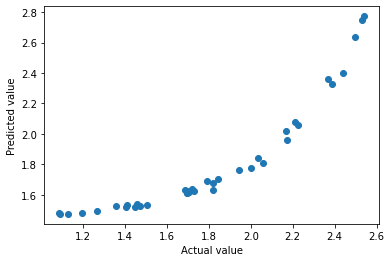

In [ ]:
plt.scatter((y_test),(y_pred_ridge))
plt.xlabel('Actual value')
plt.ylabel('Predicted value')

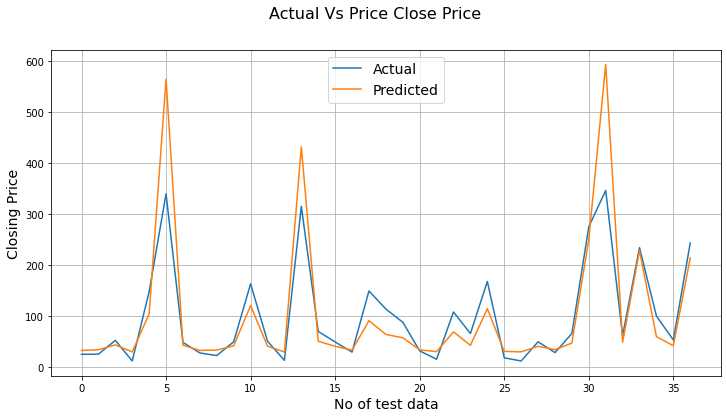

In [ ]:
plt.figure(figsize=(12,6))
plt.plot(10**(np.array(y_test)))
plt.plot(10**(y_pred_ridge))
plt.suptitle('Actual Vs Price Close Price',fontsize=16)
plt.legend(['Actual','Predicted'],fontsize=14)
plt.xlabel('No of test data',fontsize=14)
plt.ylabel('Closing Price',fontsize=14)
plt.grid()

# **Implementing Cross Validation Of Ridge**

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
#Hyperparameter Of Tunning
ridge=Ridge()
parameters={'alpha':[1e-15,1e-13,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1e-1,1,5,10,20,30,40,45,50,55,60,100]}
ridge_regressor=GridSearchCV(ridge,parameters,scoring='neg_mean_squared_error',cv=3)

In [ ]:
ridge_regressor.fit(X_train,y_train)

GridSearchCV(cv=3, estimator=Ridge(),
             param_grid={'alpha': [1e-15, 1e-13, 1e-10, 1e-08, 1e-05, 0.0001,
                                   0.001, 0.01, 0.1, 1, 5, 10, 20, 30, 40, 45,
                                   50, 55, 60, 100]},
             scoring='neg_mean_squared_error')

In [ ]:
print('The best fit alfha value is found to be:',round(ridge_regressor.best_params_['alpha'],4))
print('The negative mean squared error is:',round(ridge_regressor.best_score_,4))

The best fit alfha value is found to be: 1
The negative mean squared error is: -0.0353


In [ ]:
#Model Prediction
y_pred_ridge1=ridge_regressor.predict(X_test)
y_pred_ridge1

array([1.52363934, 1.53950359, 1.65147831, 1.48676803, 2.02341628,
       2.7257897 , 1.65011276, 1.52368738, 1.53901778, 1.62976844,
       2.07741879, 1.61843866, 1.48318818, 2.60390027, 1.70828562,
       1.61948309, 1.53219564, 1.96060489, 1.80076803, 1.75906672,
       1.54190217, 1.49450483, 1.83932752, 1.63349981, 2.05019403,
       1.50013616, 1.48828434, 1.61559809, 1.54485816, 1.68242956,
       2.36963964, 2.75593021, 1.69685984, 2.35505327, 1.77352279,
       1.62810209, 2.30469895])

In [ ]:
np.array(y_test)

array([1.4034637 , 1.40823997, 1.72090317, 1.08849047, 2.17011497,
       2.53096768, 1.68708284, 1.44638181, 1.3588862 , 1.69757803,
       2.21301278, 1.70731463, 1.12742878, 2.49837948, 1.84553212,
       1.69390274, 1.4724639 , 2.17429246, 2.05648559, 1.94517305,
       1.50419892, 1.19368103, 2.0342674 , 1.81947813, 2.22520587,
       1.2662317 , 1.08778142, 1.69731654, 1.45682135, 1.81967552,
       2.43941165, 2.53932706, 1.7895102 , 2.36973522, 2.00121433,
       1.72762258, 2.38639194])

In [ ]:
#Test Performance
print('MSE:',round(mean_squared_error(y_test,y_pred_ridge1),4))
print('MSE:',round(math.sqrt(mean_squared_error(y_test,y_pred_ridge1)),4))
print('MAE:',round(mean_absolute_error(y_test,y_pred_ridge1),4))
print('MAPE:',round(mean_absolute_percentage_error(y_test,y_pred_ridge1),4))
print('r2:',round(r2_score(y_test,y_pred_ridge1),4))

MSE: 0.0327
MSE: 0.1808
MAE: 0.1534
MAPE: 0.0971
r2: 0.8164


Text(0, 0.5, 'Predicted value')

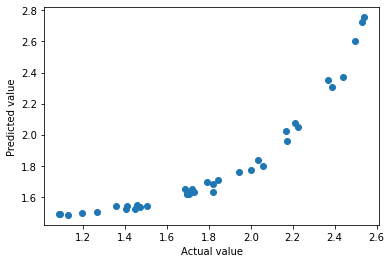

In [ ]:
plt.scatter((y_test),(y_pred_ridge1))
plt.xlabel('Actual value')
plt.ylabel('Predicted value')

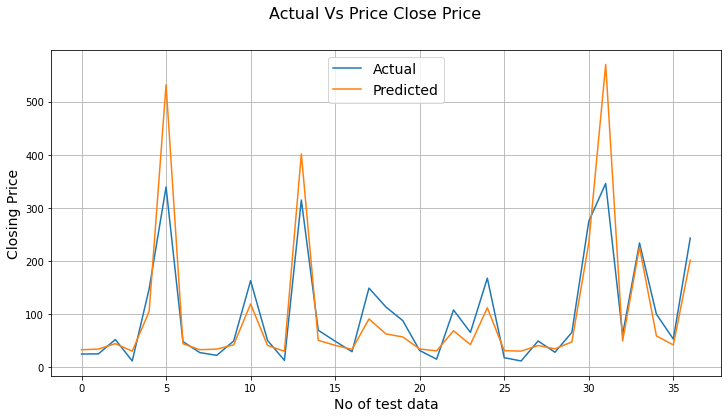

In [ ]:
#Actual Price vs Predicted Price For Lasso Regression
plt.figure(figsize=(12,6))
plt.plot(10**(np.array(y_test)))
plt.plot(10**(y_pred_ridge1))
plt.suptitle('Actual Vs Price Close Price',fontsize=16)
plt.legend(['Actual','Predicted'],fontsize=14)
plt.xlabel('No of test data',fontsize=14)
plt.ylabel('Closing Price',fontsize=14)
plt.grid()

In [ ]:
#Fitting the data into elastic net
from sklearn.linear_model import ElasticNet
 
elastic=ElasticNet(alpha=0.1,l1_ratio=0.05)
elastic_model=elastic.fit(X_train,y_train) 

In [ ]:
round(elastic.score(X_train,y_train),3)

0.721

In [ ]:
y_pred_elastic=elastic.predict(X_test)

In [ ]:
#Test Performance Of Elastic Net model
print('MSE:',round(mean_squared_error(y_test,y_pred_elastic),3))
print('MSE:',round(math.sqrt(mean_squared_error(y_test,y_pred_elastic)),3))
print('MAE:',round(mean_absolute_error(y_test,y_pred_elastic),3))
print('MAPE:',round(mean_absolute_percentage_error(y_test,y_pred_elastic),3))
print('r2:',round(r2_score(y_test,y_pred_elastic),3))


MSE: 0.051
MSE: 0.226
MAE: 0.182
MAPE: 0.118
r2: 0.714


Text(0, 0.5, 'Predicted Value')

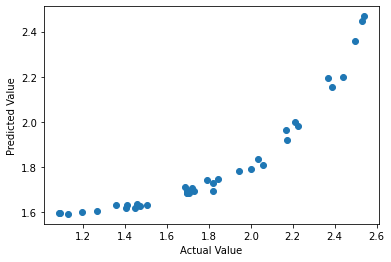

In [ ]:
plt.scatter((y_test),(y_pred_elastic))
plt.xlabel('Actual Value')
plt.ylabel('Predicted Value')

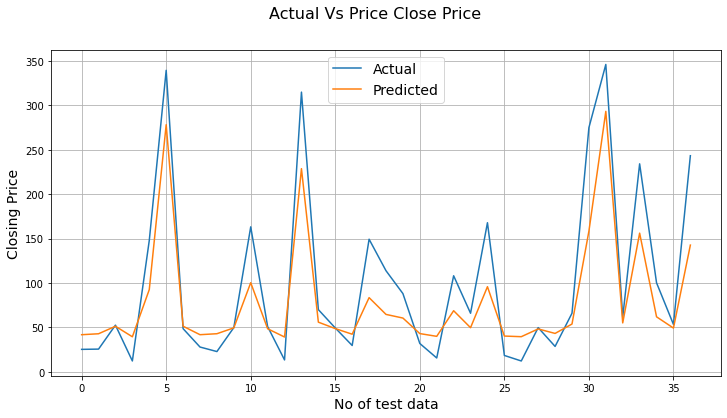

In [ ]:
#Actual Price vs Predicted Price For Elastic Regression
plt.figure(figsize=(12,6))
plt.plot(10**(np.array(y_test)))
plt.plot(10**(y_pred_elastic))
plt.suptitle('Actual Vs Price Close Price',fontsize=16)
plt.legend(['Actual','Predicted'],fontsize=14)
plt.xlabel('No of test data',fontsize=14)
plt.ylabel('Closing Price',fontsize=14)
plt.grid()

In [ ]:
#Hyper-Parameter Tunning for Elastic Net
elastic_cv=ElasticNet()
parameters={'alpha':[1e-15,1e-13,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1e-1,1,5,10,20,30,40,45,50,55,60,100],'l1_ratio':[0.3,0.4,0.5,0.6,0.7,0.8,1,2]}
elastic_model_cv=GridSearchCV(elastic_cv,parameters,scoring='neg_mean_squared_error',cv=3)

In [ ]:
elastic_model_cv.fit(X_train,y_train)

GridSearchCV(cv=3, estimator=ElasticNet(),
             param_grid={'alpha': [1e-15, 1e-13, 1e-10, 1e-08, 1e-05, 0.0001,
                                   0.001, 0.01, 0.1, 1, 5, 10, 20, 30, 40, 45,
                                   50, 55, 60, 100],
                         'l1_ratio': [0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 1, 2]},
             scoring='neg_mean_squared_error')

In [ ]:
print('The best fit alpha and L1 ratio value is found to be:',elastic_model_cv.best_params_['alpha'],elastic_model_cv.best_params_['l1_ratio'])
print('The negative mean squared error for is',round(elastic_model_cv.best_score_,3))

The best fit alpha and L1 ratio value is found to be: 0.001 1
The negative mean squared error for is -0.035


In [ ]:
y_pred_elastic_cv=elastic_model_cv.predict(X_test)
y_pred_elastic_cv

array([1.51948517, 1.53474676, 1.64008318, 1.47887097, 2.01529694,
       2.7437218 , 1.63177602, 1.51986028, 1.52812486, 1.62387701,
       2.07832179, 1.61758243, 1.47681346, 2.63226656, 1.70654748,
       1.61353024, 1.52730079, 1.95658217, 1.81264649, 1.76336203,
       1.53486131, 1.48494559, 1.84017341, 1.63671799, 2.05886139,
       1.49383792, 1.48024548, 1.61501616, 1.53873718, 1.67352788,
       2.40238239, 2.76153997, 1.68698106, 2.35080149, 1.78006184,
       1.62620093, 2.33253503])

In [ ]:
#Test Performance Of Elastic Net Model After Validation
print('MSE:',round(mean_squared_error(y_test,y_pred_elastic),4))
print('MSE:',round(math.sqrt(mean_squared_error(y_test,y_pred_elastic)),4))
print('MAE:',round(mean_absolute_error(y_test,y_pred_elastic),4))
print('MAPE:',round(mean_absolute_percentage_error(y_test,y_pred_elastic),4))
print('r2:',round(r2_score(y_test,y_pred_elastic),4))

MSE: 0.0509
MSE: 0.2256
MAE: 0.1818
MAPE: 0.1184
r2: 0.7141


Text(0, 0.5, 'Predicted Value')

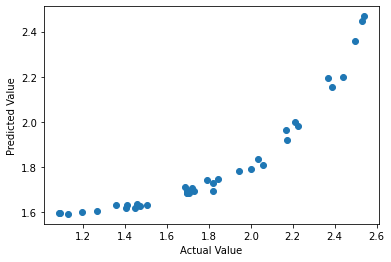

In [ ]:
plt.scatter((y_test),(y_pred_elastic))
plt.xlabel('Actual Value')
plt.ylabel('Predicted Value')

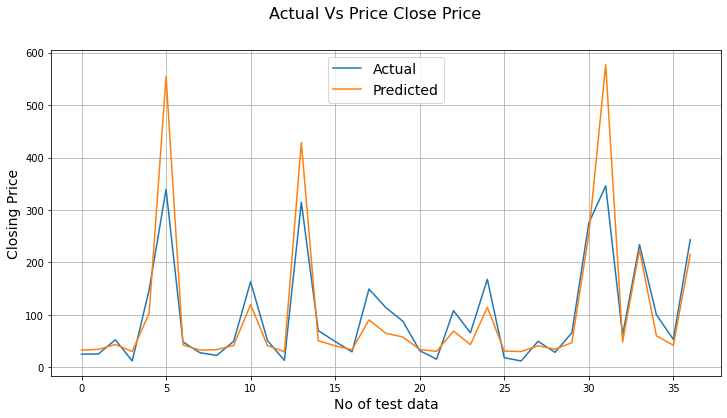

In [ ]:
#Actual Price vs Predicted Value for Elastic Net after Validation Plotting
plt.figure(figsize=(12,6))
plt.plot(10**(np.array(y_test)))
plt.plot(10**(y_pred_elastic_cv))
plt.suptitle('Actual Vs Price Close Price',fontsize=16)
plt.legend(['Actual','Predicted'],fontsize=14)
plt.xlabel('No of test data',fontsize=14)
plt.ylabel('Closing Price',fontsize=14)
plt.grid()

# **Conclusion**

1.The popularity of stock closing is growing extremely rapidly day by day which encourage researcher to find new methods if any fraud happens.

2.This technique is used for prediction is not only helpful to researchers to predict future stock closing prices or any fraud happen or not but also helps investors or any person who dealing with the stock market in order to prediction of model with good accuracy.

3.In this work we use linear regression technique, lasso regression, ridge regression and elastic net regression technique. these four models gives us the following results

4.High, low, open are directly correlate with the closing price of stocks

5.Target variable(dependent variable) strongly dependent on independent variables

6.We get maximum accuracy of 82%